## Imports

In [190]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import configparser
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## API Authentication

### Read Configs

In [191]:
# Secure the necessary keys on config.ini file
config = configparser.ConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']

access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

### Tweepy Authentication

In [192]:
# Initialize API
auth =  tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

## Collect tweets from Bill Gates

In [193]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count=100, tweet_mode="extended")

# Print the lastest 5 tweets
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') ' + tweet.full_text + '\n')
    i = i + 1

Show the 5 recent tweets: 

1) @YONeal1 Nice! Happy Father’s Day to your fathers too!!

2) @LanguageIgbo Thank you!

3) I love you, Dad. https://t.co/GSqHUGlgt8

4) @stewartbrand Stewart, I very much hope the future world gets many more “hucksters” like you. We will be better for it!

5) Incredible https://t.co/mahsnjatRi



## Data Preparation

### Store to pandas DataFrame

In [194]:
# Create DataFrame with a column name "Tweets"
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# Print the first five rows of data
df

,Tweets
0,@YONeal1 Nice! Happy Father’s Day to your fath...
1,@LanguageIgbo Thank you!
2,"I love you, Dad. https://t.co/GSqHUGlgt8"
3,"@stewartbrand Stewart, I very much hope the fu..."
4,Incredible https://t.co/mahsnjatRi
...,...
95,"At #COP26, Lauren and I discussed conservation..."
96,Wonderful meeting with Tuntiak Katan from the ...
97,The Prince of Wales has been involved in fight...
98,"“Closing my eyes now, I still feel that irresi..."


### Data Cleaning

In [195]:
# Create a function to clean data using Regular Expression Operations
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove the @usernames
    text = re.sub(r'#', '', text)              # Remove the '#' characters
    text = re.sub(r'RT[\s]+', '', text)        # Remove the RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove the website link
    return text

# Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanText)

# Show the cleaned text
df

,Tweets
0,Nice! Happy Father’s Day to your fathers too!!
1,Thank you!
2,"I love you, Dad."
3,"Stewart, I very much hope the future world ge..."
4,Incredible
...,...
95,"At COP26, Lauren and I discussed conservation ..."
96,Wonderful meeting with Tuntiak Katan from the ...
97,The Prince of Wales has been involved in fight...
98,"“Closing my eyes now, I still feel that irresi..."


## Sentiment Analysis

### Subjectivity

In [196]:
# Create a function to get the Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create new column
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)

### Polarity Score

In [197]:
# Create a function to get the Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create new column
df['Polarity'] = df['Tweets'].apply(getPolarity)

### Show the DataFrame with the two new columns

In [198]:
df

,Tweets,Subjectivity,Polarity
0,Nice! Happy Father’s Day to your fathers too!!,1.000,0.8750
1,Thank you!,0.000,0.0000
2,"I love you, Dad.",0.600,0.5000
3,"Stewart, I very much hope the future world ge...",0.377,0.3770
4,Incredible,0.900,0.9000
...,...,...,...
95,"At COP26, Lauren and I discussed conservation ...",0.500,0.5000
96,Wonderful meeting with Tuntiak Katan from the ...,0.500,0.5000
97,The Prince of Wales has been involved in fight...,0.875,0.4625
98,"“Closing my eyes now, I still feel that irresi...",0.000,0.0000


## Plot all the words using Word Cloud

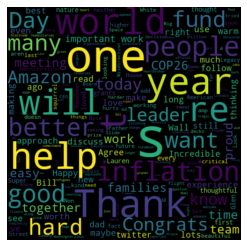

In [199]:
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width=500, height=500, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the Word Cloud
wordCloud.to_file("wordcloud.png")

## Analysis for Polarity Score

In [200]:
# Create a function to identify the negative, neutral and positive analysis for every tweet
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the DataFrame
df

,Tweets,Subjectivity,Polarity,Analysis
0,Nice! Happy Father’s Day to your fathers too!!,1.000,0.8750,Positive
1,Thank you!,0.000,0.0000,Neutral
2,"I love you, Dad.",0.600,0.5000,Positive
3,"Stewart, I very much hope the future world ge...",0.377,0.3770,Positive
4,Incredible,0.900,0.9000,Positive
...,...,...,...,...
95,"At COP26, Lauren and I discussed conservation ...",0.500,0.5000,Positive
96,Wonderful meeting with Tuntiak Katan from the ...,0.500,0.5000,Positive
97,The Prince of Wales has been involved in fight...,0.875,0.4625,Positive
98,"“Closing my eyes now, I still feel that irresi...",0.000,0.0000,Neutral


## Show all positive tweets

In [201]:
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j = j + 1

1)  Nice! Happy Father’s Day to your fathers too!!

2) I love you, Dad. 

3)  Stewart, I very much hope the future world gets many more “hucksters” like you. We will be better for it!

4) Incredible 

5)  Yes, a strong scent. “Non Legacy American” is so intellectually bankrupt.

6) What a truly beautiful observation… 

7) Thanks for the history shout out here. Many twists and turns and failures and successes in those 23 years… 

8) _elenwo No, not really like that. He (Rob Hof) was just reporting accurately the general Wall Street sentiment. In fact, same reporter wrote a follow up ten years later. That kind of follow up is pretty rare in my experience and commendable.

9) I have this old 2006 BusinessWeek framed as a reminder. The “risky bet” that Wall Street disliked was AWS, which generated revenue of more than $62 billion last year. 

10)  Seen you refer to yourself as a sh*tposter but maybe you’re mostly just a wiseposter.

11) : Some left-leaning economists &amp; political operat

## Show all negative tweets

In [202]:
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j = j + 1

1)   Thank you. I’ve been working hard on my ass.

2) _gul Agree with you it’s sad

3) If you’re looking for some scary bedtime reading… 

4) The news from Edwardsville is tragic. We’re heartbroken over the loss of our teammates there, and our thoughts and prayers are with their families and loved ones. (1/2)

5) For the fourth year in a row, the Bezos Day 1 Families Fund is making donations to organizations helping families in need across the U.S. These grants will provide support including housing, food, clothing, and other resources to help families get back on their feet. (1/2) 



## Plot the polarity and subjectivity

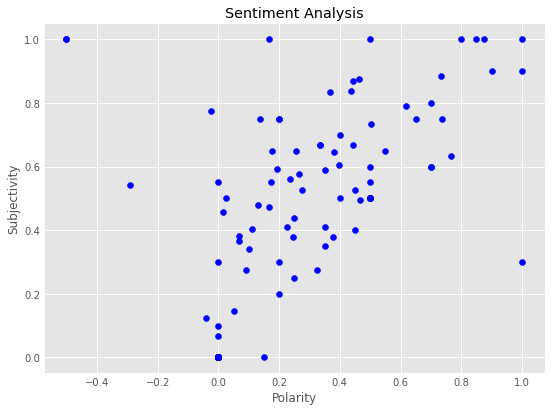

In [203]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Save the graph
plt.savefig('Polarity_vs_Subjectivity.png')

# Show the graph
plt.show()


## Percentage of positive tweets

In [204]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

# Round by first decimal value
round((ptweets.shape[0] / df.shape[0]) * 100, 1)

73.0

## Percentage of negative tweets

In [205]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

# Round by first decimal value
round((ntweets.shape[0] / df.shape[0]) * 100, 1)

5.0

## Percentage of neutral tweets

In [206]:
neu_tweets = df[df.Analysis == 'Neutral']
neu_tweets = neu_tweets['Tweets']

# Round by first decimal value
round((neu_tweets.shape[0] / df.shape[0]) * 100, 1)

22.0

## Plot the counts

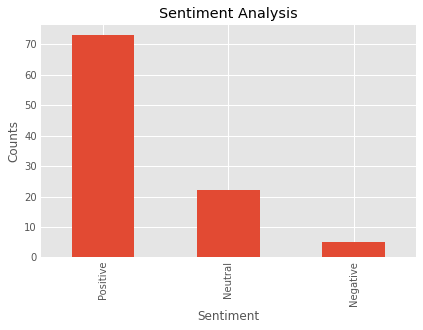

In [207]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')

# Save the graph
plt.savefig('Sentiments_vs_Counts.png')

# Show the graph
plt.show()